In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv('BundesligaCombined.csv') 
df.head(10)
#df.to_csv('BundesligaCombined1.csv', index=False)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AC,HF,AF,HO,AO,HY,AY,HR,AR,Time
0,D1,07/08/1993,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D1,07/08/1993,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D1,07/08/1993,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D1,07/08/1993,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D1,07/08/1993,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,D1,07/08/1993,Leipzig,Dresden,3,3,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,D1,07/08/1993,M'Gladbach,Ein Frankfurt,0,4,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,D1,07/08/1993,Wattenscheid,Schalke 04,3,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,D1,07/08/1993,Werder Bremen,Stuttgart,5,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,D1,14/08/1993,Dresden,Duisburg,0,1,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.shape

(9576, 29)

In [40]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Attendance', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HHW',
       'AHW', 'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR',
       'Time'],
      dtype='object')

In [41]:
# Assuming df is your DataFrame
df = df.drop('Div', axis=1)
df.columns


Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Attendance', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW',
       'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR', 'Time'],
      dtype='object')

In [42]:
# Assuming you have a DataFrame named 'df'
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/08/1993' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/08/1993' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/08/1993' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/09/1993' in DD/MM/YYYY format. Provide format or sp

In [43]:
# Extract the day of the week and year
df['day_of_week'] = df['Date'].dt.day_name()
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df.tail(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,...,HO,AO,HY,AY,HR,AR,Time,day_of_week,year,month
9566,2024-03-11,M'gladbach,Werder Bremen,4,1,H,3.0,0.0,H,NaN,...,NaN,NaN,1.0,4.0,0.0,1.0,16:30,Monday,2024,3
9567,2024-08-11,Union Berlin,Freiburg,0,0,D,0.0,0.0,D,NaN,...,NaN,NaN,2.0,0.0,0.0,0.0,19:30,Sunday,2024,8
9568,2024-09-11,Bochum,Leverkusen,1,1,D,0.0,1.0,A,NaN,...,NaN,NaN,0.0,1.0,0.0,0.0,14:30,Wednesday,2024,9
9569,2024-09-11,Mainz,Dortmund,3,1,H,2.0,1.0,H,NaN,...,NaN,NaN,3.0,1.0,0.0,1.0,14:30,Wednesday,2024,9
9570,2024-09-11,St Pauli,Bayern Munich,0,1,A,0.0,1.0,A,NaN,...,NaN,NaN,2.0,2.0,0.0,0.0,14:30,Wednesday,2024,9
9571,2024-09-11,Werder Bremen,Holstein Kiel,2,1,H,1.0,0.0,H,NaN,...,NaN,NaN,3.0,2.0,0.0,0.0,14:30,Wednesday,2024,9
9572,2024-09-11,RB Leipzig,M'gladbach,0,0,D,0.0,0.0,D,NaN,...,NaN,NaN,2.0,2.0,0.0,0.0,17:30,Wednesday,2024,9
9573,2024-10-11,Augsburg,Hoffenheim,0,0,D,0.0,0.0,D,NaN,...,NaN,NaN,2.0,3.0,0.0,0.0,14:30,Friday,2024,10
9574,2024-10-11,Stuttgart,Ein Frankfurt,2,3,A,0.0,1.0,A,NaN,...,NaN,NaN,2.0,3.0,0.0,0.0,16:30,Friday,2024,10
9575,2024-10-11,Heidenheim,Wolfsburg,1,3,A,0.0,2.0,A,NaN,...,NaN,NaN,1.0,6.0,0.0,0.0,18:30,Friday,2024,10


In [44]:
werder_bremen_home_matches = df[df['HomeTeam'] == 'Werder Bremen']

# Filter out rows with NaN values in the specified columns
filtered_data = werder_bremen_home_matches.dropna(subset=['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
                                                     'HTR', 'Attendance', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW',
                                                     'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR'])

# Calculate the median for each column
median_values = filtered_data[['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
                               'HTR', 'Attendance', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW',
                               'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR']].median()

print(median_values)

FTHG              2.0
FTAG              1.0
HTHG              1.0
HTAG              0.0
Attendance    29155.0
HS               15.0
AS                9.0
HST               6.0
AST               3.5
HHW               0.0
AHW               0.0
HC                6.5
AC                3.5
HF               17.0
AF               18.0
HO                4.0
AO                3.0
HY                2.0
AY                2.0
HR                0.0
AR                0.0
dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33508\1098269258.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = filtered_data[['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',


In [45]:
werder_bremen_home_matches = df[df['HomeTeam'] == 'Werder Bremen']

# Filter out rows with NaN values in the specified columns
filtered_data = werder_bremen_home_matches.dropna(subset=['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
                                                     'HTR', 'Attendance', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW',
                                                     'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR'])

# Calculate the median for each column
median_values = filtered_data[['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
                               'HTR', 'Attendance', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW',
                               'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR']].median()
# Group the filtered data by year and calculate the median for each group
grouped_data = filtered_data.groupby('year').agg(np.median)

print(grouped_data)

      FTHG  FTAG  HTHG  HTAG  Attendance    HS   AS  HST  AST  HHW  ...   AC  \
year                                                                ...        
2000   1.5   1.0   0.0   1.0     26750.0  10.5  6.0  4.0  3.5  0.0  ...  5.0   
2001   2.0   1.0   1.0   0.0     29810.0  15.0  9.0  6.0  4.0  0.0  ...  3.0   
2002   1.0   2.0   0.0   0.0     31350.0  17.0  7.0  8.0  3.0  0.0  ...  2.0   

        HF    AF   HO   AO   HY   AY   HR   AR  month  
year                                                   
2000  13.5  19.5  4.5  2.5  2.5  2.0  0.0  0.0   10.0  
2001  18.0  18.0  4.0  3.0  2.0  2.0  0.0  0.0    6.0  
2002  17.0  17.0  5.0  3.0  2.0  2.0  0.0  0.0    3.0  

[3 rows x 22 columns]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33508\2261664611.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = filtered_data[['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',


In [47]:
#werder_bremen_home_matches = df[df['HomeTeam'] == 'Werder Bremen']
#werder_bremen_home_matches = df[(df['HomeTeam'] == 'Werder Bremen') & (df['year'] == 2022)]
werder_bremen_home_matches = df[(df['HomeTeam'] == 'Werder Bremen') & (df['year'].isin([2022, 2023, 2024]))]


#werder_bremen_home_matches.tail(10)
#werder_bremen_home_matches.tail(10)
werder_bremen_home_matches

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,...,HO,AO,HY,AY,HR,AR,Time,day_of_week,year,month
8888,2022-08-13,Werder Bremen,Stuttgart,2,2,D,1.0,1.0,D,NaN,...,NaN,NaN,4.0,2.0,0.0,0.0,NaN,Saturday,2022,8
8909,2022-08-28,Werder Bremen,Ein Frankfurt,3,4,A,2.0,3.0,A,NaN,...,NaN,NaN,1.0,3.0,0.0,0.0,NaN,Sunday,2022,8
8919,2022-09-09,Werder Bremen,Augsburg,0,1,A,0.0,0.0,D,NaN,...,NaN,NaN,4.0,5.0,0.0,0.0,NaN,Friday,2022,9
8943,2022-01-10,Werder Bremen,M'gladbach,5,1,H,4.0,0.0,H,NaN,...,NaN,NaN,0.0,1.0,0.0,0.0,NaN,Monday,2022,1
8958,2022-10-15,Werder Bremen,Mainz,0,2,A,0.0,1.0,A,NaN,...,NaN,NaN,1.0,2.0,0.0,0.0,NaN,Saturday,2022,10
8973,2022-10-28,Werder Bremen,Hertha,1,0,H,0.0,0.0,D,NaN,...,NaN,NaN,2.0,3.0,0.0,0.0,NaN,Friday,2022,10
8988,2022-05-11,Werder Bremen,Schalke 04,2,1,H,1.0,0.0,H,NaN,...,NaN,NaN,3.0,2.0,0.0,0.0,NaN,Wednesday,2022,5
9005,2022-12-11,Werder Bremen,RB Leipzig,1,2,A,0.0,1.0,A,NaN,...,NaN,NaN,1.0,2.0,0.0,0.0,NaN,Sunday,2022,12
9026,2023-01-25,Werder Bremen,Union Berlin,1,2,A,1.0,1.0,D,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,Wednesday,2023,1
9032,2023-01-28,Werder Bremen,Wolfsburg,2,1,H,1.0,0.0,H,NaN,...,NaN,NaN,3.0,3.0,0.0,0.0,NaN,Saturday,2023,1


In [46]:
# import and merge records for 2024
# Count the number of matching records
record_count = df[(df['HomeTeam'] == 'Werder Bremen') & (df['year'].isin([2022,2023,2024]))].shape[0]

print(f"Number of records: {record_count}")

Number of records: 39


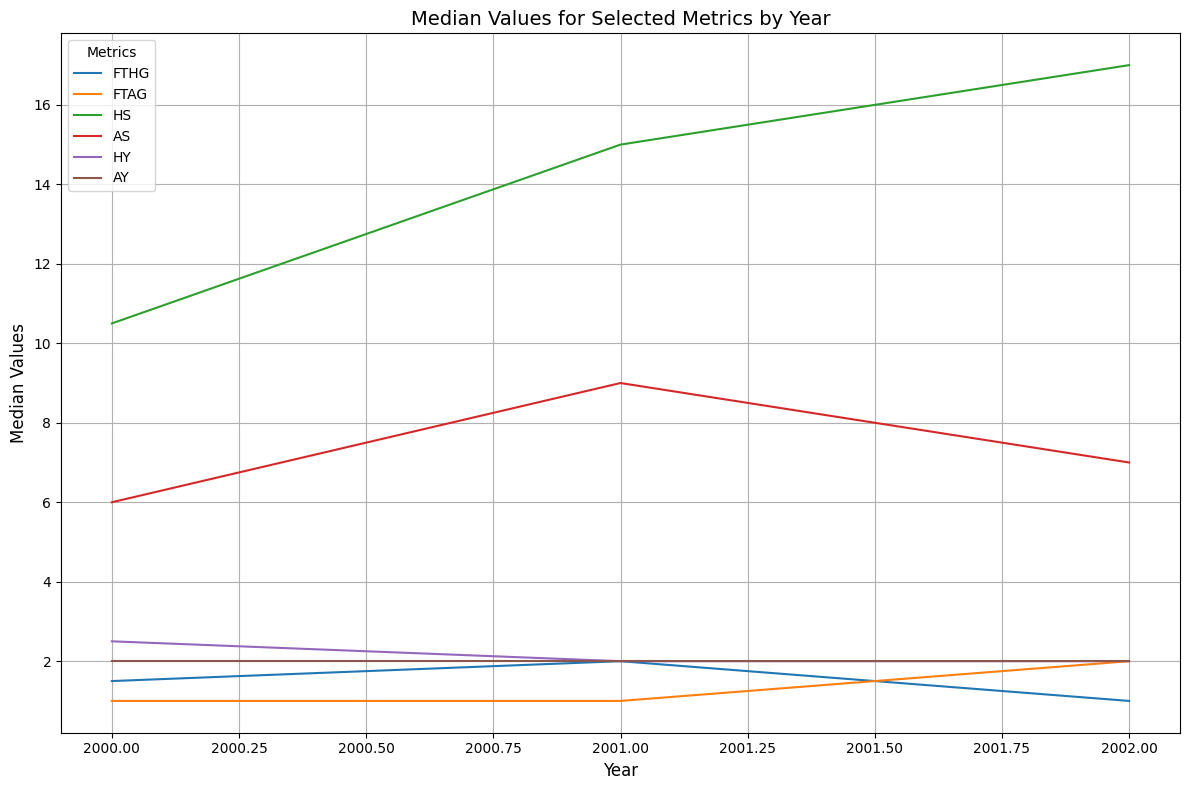

In [48]:
# Select relevant columns to plot
#columns_to_plot = ['Attendance', 'FTHG', 'FTAG', 'HS', 'AS', 'HY', 'AY']
columns_to_plot = ['FTHG', 'FTAG', 'HS', 'AS', 'HY', 'AY']
grouped_data_subset = grouped_data[columns_to_plot]

# Create line plots for each column
plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    plt.plot(grouped_data.index, grouped_data[column], label=column)

# Add title, labels, and legend
plt.title("Median Values for Selected Metrics by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Values", fontsize=12)
plt.legend(title="Metrics", fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
#merge data for 2023/2024 and 2024/2025
#first remove the year and date column
#add month column